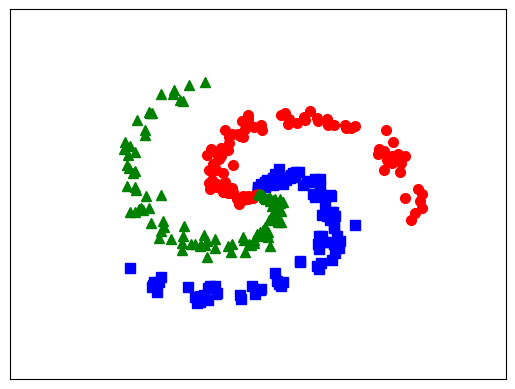

In [24]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels
for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

In [29]:
print(X.shape)
print(y.shape)

(2, 300)
(300,)


In [21]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [53]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
# print(W1)
b1 = np.zeros((d1, 1))
print(W1.shape)
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
# print(N)
eta = 1 # learning rate
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    # print(Z1.shape)
    A1 = np.maximum(Z1, 0)
    # print(A1.shape)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)
    # print(Yhat[0][0].shape)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        # print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    print(E2.shape)
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    print(db2)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

(2, 100)
(3, 300)
[[-6.86874835e-06]
 [-7.76073015e-06]
 [ 1.46294785e-05]]
(3, 300)
[[ 1.07328775e-05]
 [-3.25155215e-05]
 [ 2.17826440e-05]]
(3, 300)
[[ 2.27454592e-05]
 [-5.37778951e-05]
 [ 3.10324359e-05]]
(3, 300)
[[ 2.65987090e-05]
 [-7.04387508e-05]
 [ 4.38400418e-05]]
(3, 300)
[[ 3.10468384e-05]
 [-8.72865947e-05]
 [ 5.62397562e-05]]
(3, 300)
[[ 4.21271488e-05]
 [-1.08219267e-04]
 [ 6.60921185e-05]]
(3, 300)
[[ 5.53849601e-05]
 [-1.40599814e-04]
 [ 8.52148539e-05]]
(3, 300)
[[ 6.45092399e-05]
 [-1.76168777e-04]
 [ 1.11659537e-04]]
(3, 300)
[[ 8.58151346e-05]
 [-2.31662395e-04]
 [ 1.45847260e-04]]
(3, 300)
[[ 0.0001049 ]
 [-0.00029238]
 [ 0.00018748]]
(3, 300)
[[ 0.00012093]
 [-0.00035041]
 [ 0.00022948]]
(3, 300)
[[ 0.00015336]
 [-0.0004328 ]
 [ 0.00027944]]
(3, 300)
[[ 0.00020075]
 [-0.00053533]
 [ 0.00033458]]
(3, 300)
[[ 0.00026616]
 [-0.00065609]
 [ 0.00038993]]
(3, 300)
[[ 0.00034985]
 [-0.00080682]
 [ 0.00045698]]
(3, 300)
[[ 0.00046226]
 [-0.00098195]
 [ 0.00051969]]
(3,

In [44]:
import numpy as np

# Giả định đầu ra Z1 từ lớp ẩn đầu tiên
d1 = 5  # Kích thước lớp ẩn
N = 4  # Số lượng điểm dữ liệu
Z1 = np.random.randn(d1, N)  # Giả định đầu ra của lớp ẩn

# Áp dụng hàm kích hoạt ReLU
A1 = np.maximum(Z1, 0)

# In kết quả
print("Đầu ra Z1:")
print(Z1)
print("\nĐầu ra sau khi áp dụng ReLU:")
print(A1)


Đầu ra Z1:
[[-1.59439841  0.67170856 -0.8981461  -1.3287849 ]
 [-0.59104008 -1.78846484  0.37107823  0.18511902]
 [-0.00968946  0.63920281 -0.53586458 -1.11831399]
 [-1.02525856 -2.56289998 -0.42768613  0.71085088]
 [ 0.48550994 -1.61667556  0.16566177 -1.99788091]]

Đầu ra sau khi áp dụng ReLU:
[[0.         0.67170856 0.         0.        ]
 [0.         0.         0.37107823 0.18511902]
 [0.         0.63920281 0.         0.        ]
 [0.         0.         0.         0.71085088]
 [0.48550994 0.         0.16566177 0.        ]]


In [56]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = (100*np.mean(predicted_class == y))
print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y)))

training accuracy: 99.33 %


(1, 14400)
100


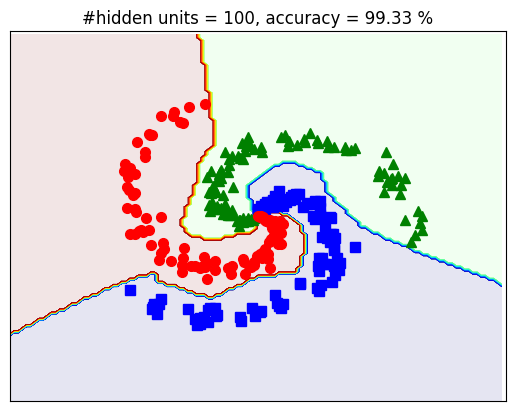

In [57]:

xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

X0 = np.vstack((xx1, yy1))

# print(X.shape)

Z1 = np.dot(W1.T, X0) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class 
Z = np.argmax(Z2, axis=0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# X = X.T
N = 100
print(N)


plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()

In [58]:
import numpy as np
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Khởi tạo các tham số của mạng neural
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        
        # Khởi tạo trọng số và bias cho lớp ẩn và lớp đầu ra
        self.weights_hidden = np.random.randn(self.input_dim, self.hidden_dim)
        self.bias_hidden = np.zeros((1, self.hidden_dim))
        self.weights_output = np.random.randn(self.hidden_dim, self.output_dim)
        self.bias_output = np.zeros((1, self.output_dim))
        
    def relu(self, x):
        # Hàm kích hoạt ReLU
        return np.maximum(0, x)
    
    def softmax(self, x):
        # Hàm kích hoạt softmax cho đầu ra
        exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    def forward(self, X):
        # Feedforward - tính toán đầu ra của mạng dựa trên đầu vào X
        hidden_layer_input = np.dot(X, self.weights_hidden) + self.bias_hidden
        hidden_layer_output = self.relu(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_output) + self.bias_output
        output_probs = self.softmax(output_layer_input)
        return output_probs
    
    def train(self, X, y, learning_rate, epochs):
        # Huấn luyện mạng neural dựa trên dữ liệu đào tạo (X) và nhãn (y)
        for epoch in range(epochs):
            # Feedforward
            hidden_layer_input = np.dot(X, self.weights_hidden) + self.bias_hidden
            hidden_layer_output = self.relu(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights_output) + self.bias_output
            output_probs = self.softmax(output_layer_input)
            
            # Tính gradient theo hàm mất mát cross-entropy
            num_samples = X.shape[0]
            d_output = output_probs
            d_output[range(num_samples), y] -= 1
            d_output /= num_samples
            
            # Backpropagation - cập nhật trọng số và bias dựa trên gradient
            d_hidden = np.dot(d_output, self.weights_output.T)
            d_hidden[hidden_layer_input <= 0] = 0
            
            self.weights_output -= learning_rate * np.dot(hidden_layer_output.T, d_output)
            self.bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
            self.weights_hidden -= learning_rate * np.dot(X.T, d_hidden)
            self.bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)
# Chuẩn bị dữ liệu giả định
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Định nghĩa mạng neural với các thông số kích thước đầu vào, lớp ẩn và đầu ra
input_dim = 2
hidden_dim = 2
output_dim = 2
learning_rate = 0.1
epochs = 10000

# Tạo và huấn luyện mạng neural
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
model.train(X, y, learning_rate, epochs)

# Dự đoán đầu ra cho các điểm dữ liệu đầu vào
predictions = np.argmax(model.forward(X), axis=1)
print("Dự đoán của mô hình: ", predictions)


Dự đoán của mô hình:  [0 1 1 0]
